### Ondiagonal pile-up

To extract the average properties of a feature in a Hi-C map, we can make a summation of the snippets with specified feature (e.g., TADs). In this notebook we showed the usage of pile-up functions for the analysis of few fetures. For the average properties such as flames we might be interested in working on normalized map, to be unbiased with respect to the distance from the diagonal.

In [5]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import ast
import chromoscores.maputils as chrmap

### Loading simulated data

In [3]:
directory = '/project/fudenber_735/polychrom/pds5_wapl_nipbl/layout_with_random_b/'

samples = [
    'LIFETIME_50_SEPARATION_100_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_1_Tad_1000',
    'LIFETIME_50_SEPARATION_150_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_1_Tad_1000',
    'LIFETIME_50_SEPARATION_500_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_1_Tad_1000'
]
path_dict = {name: f"{directory}maps/{name}" for name in samples}


### Analysis

In [4]:
# List of the position of boundary elements on the main diagonal.
right_boundary_list = [15, 50, 115, 175, 519, 670, 830, 1100, 1180, 1270, 1350]
right_boundary_list = [elem + 1500 for elem in right_boundary_list]

left_boundary_list = [40, 70, 135, 275, 510, 650, 730, 870, 1185, 1240, 1330, 1390]
left_boundary_list = [elem + 1500 for elem in left_boundary_list]

boundary_list = np.sort(np.unique(right_boundary_list + left_boundary_list))


---

function for processing contact maps

In [ ]:
def process_map_data(name: str, path_dict: dict, boundary_list: list) -> np.ndarray:
    """
    Process focal cell data and return the processed pileup.

    Parameters:
        name (str): The name of the data to be processed.
        path_dict (dict): A dictionary containing paths to data files.
        boundary_list (list): List of boundaries for data processing.

    Returns:
        np.ndarray: Processed pileup data.
    """

    # Load data from the specified path
    data = np.load(path_dict[name] + '.npz')
    
    # Convert data to float and normalize by the median diagonal element
    mapn = data['arr_0']
    map = mapn.astype(float)
    map /= np.median(np.diag(map, 2))
    
    # Calculate the observed over expected data using chrmap methods
    map_exp = chrmap.get_observed_over_expected(map)
    
    # Calculate diagonal pileup using chrmap method with specified window size
    pileup = chrmap.get_diagonal_pileup(map_exp, boundary_list[1:], window_size = 196)
    
    return pileup

- If we consider all of the boundary elements:

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home1/rahmanin/repositories/chromoscores/chromoscores/maputils.py:79: RuntimeWarning: invalid value encountered in double_scalars
  mat[i, i + j] = contact_map[i, i + j] / (np.mean(np.diag(contact_map, k=j)))


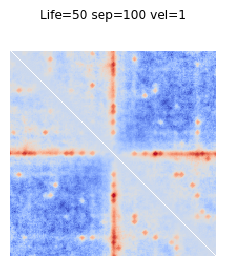

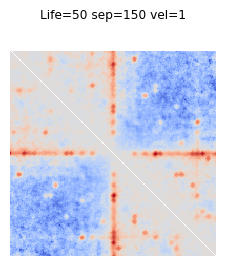

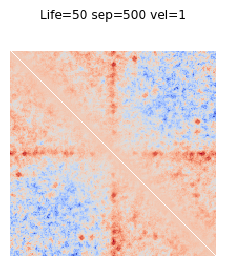

In [7]:
# Iterate over samples
for name in samples:
    # Extract parameters from sample name
    params = [ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall, lstall, rc, lc, stalldist, steps, velocity, Tad = params
    
    # Import saved maps as matrices
    pile = process_map_data(name, path_dict, boundary_list[1:])
    
    # Figure characteristics
    subplot_width = 3
    numx, numy = 3, 1
    
    # Create the figure
    plt.figure(figsize=(subplot_width * numx, subplot_width * numy))
    
    # Plot the pile
    plt.subplot(numy, numx, 1)
    plt.matshow(np.log10(pile), cmap='coolwarm', fignum=False)
    plt.title('Life=%s sep=%s vel=%s' % (Lifetime, separation, velocity), fontsize = 8.75)
    plt.axis('off')
    
    # Show the figure
    plt.show()


---

- If we consider only the right-stall boundary elements:

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


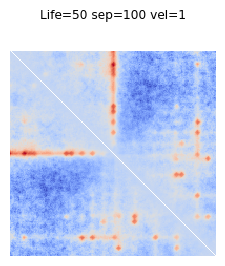

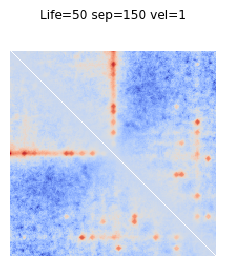

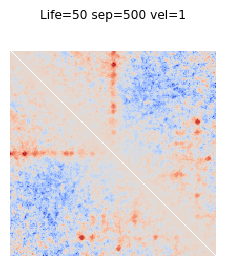

In [8]:
# Iterate over samples
for name in samples:
    # Extract parameters from sample name
    params = [ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall, lstall, rc, lc, stalldist, steps, velocity, Tad = params
    
    # Import saved maps as matrices
    pile = process_map_data(name, path_dict, right_boundary_list[1:])
    
    # Figure characteristics
    subplot_width = 3
    numx, numy = 3, 1
    
    # Create the figure
    plt.figure(figsize=(subplot_width * numx, subplot_width * numy))
    
    # Plot the pile
    plt.subplot(numy, numx, 1)
    plt.matshow(np.log10(pile), cmap='coolwarm', fignum=False)
    plt.title('Life=%s sep=%s vel=%s' % (Lifetime, separation, velocity), fontsize = 8.75)
    plt.axis('off')
    
    # Show the figure
    plt.show()


---

- And if we consider only the left_stall boundary elements:

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


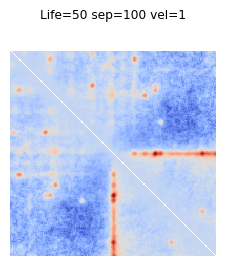

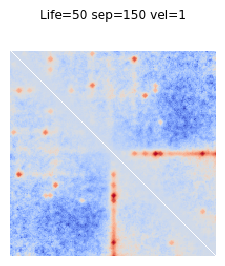

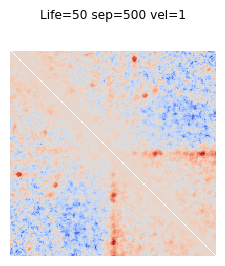

In [10]:
# Iterate over samples
for name in samples:
    # Extract parameters from sample name
    params = [ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall, lstall, rc, lc, stalldist, steps, velocity, Tad = params
    
    # Import saved maps as matrices
    pile = process_map_data(name, path_dict, left_boundary_list[1:])
    
    # Figure characteristics
    subplot_width = 3
    numx, numy = 3, 1
    
    # Create the figure
    plt.figure(figsize=(subplot_width * numx, subplot_width * numy))
    
    # Plot the pile
    plt.subplot(numy, numx, 1)
    plt.matshow(np.log10(pile), cmap='coolwarm', fignum=False)
    plt.title('Life=%s sep=%s vel=%s' % (Lifetime, separation, velocity), fontsize=8.75)
    plt.axis('off')
    
    # Show the figure
    plt.show()